# Q2 - Mainland China 
Data from Mainland China in the early stages of the pandemic

In [47]:
# We printed one exmpale of the csv file to see
# what data we need to extract

import pandas as pd

file_path = pd.read_csv('01-22-2020.csv')

print(file_path.to_string())

       Province/State        Country/Region      Last Update  Confirmed  Deaths  Recovered
0               Anhui        Mainland China  1/22/2020 17:00        1.0     NaN        NaN
1             Beijing        Mainland China  1/22/2020 17:00       14.0     NaN        NaN
2           Chongqing        Mainland China  1/22/2020 17:00        6.0     NaN        NaN
3              Fujian        Mainland China  1/22/2020 17:00        1.0     NaN        NaN
4               Gansu        Mainland China  1/22/2020 17:00        NaN     NaN        NaN
5           Guangdong        Mainland China  1/22/2020 17:00       26.0     NaN        NaN
6             Guangxi        Mainland China  1/22/2020 17:00        2.0     NaN        NaN
7             Guizhou        Mainland China  1/22/2020 17:00        1.0     NaN        NaN
8              Hainan        Mainland China  1/22/2020 17:00        4.0     NaN        NaN
9               Hebei        Mainland China  1/22/2020 17:00        1.0     NaN        NaN

In [95]:
# Here, we presented the columns showing the data
# for confirmed cases, deaths and recoveries
import pandas as pd

file_path = pd.read_csv('01-22-2020.csv')

selected_columns = ['Confirmed', 'Deaths', 'Recovered']
selected_data = file_path[selected_columns]

print(selected_data.to_string())

    Confirmed  Deaths  Recovered
0         1.0     NaN        NaN
1        14.0     NaN        NaN
2         6.0     NaN        NaN
3         1.0     NaN        NaN
4         NaN     NaN        NaN
5        26.0     NaN        NaN
6         2.0     NaN        NaN
7         1.0     NaN        NaN
8         4.0     NaN        NaN
9         1.0     NaN        NaN
10        NaN     NaN        NaN
11        5.0     NaN        NaN
12        NaN     NaN        NaN
13      444.0    17.0       28.0
14        4.0     NaN        NaN
15        NaN     NaN        NaN
16        1.0     NaN        NaN
17        2.0     NaN        NaN
18        NaN     NaN        NaN
19        2.0     NaN        NaN
20        1.0     NaN        NaN
21        1.0     NaN        NaN
22        NaN     NaN        NaN
23        NaN     NaN        NaN
24        2.0     NaN        NaN
25        9.0     NaN        NaN
26        1.0     NaN        NaN
27        5.0     NaN        NaN
28        1.0     NaN        NaN
29        

In [101]:
# We filtered the data further so that the 
# the data with confirmed cases, deaths, and 
# recoveries were only for those in Mainland
# China
import pandas as pd

file_path = pd.read_csv('01-22-2020.csv')

china_df = file_path[file_path['Country/Region'] == 'Mainland China']

selected_columns = ['Confirmed', 'Deaths', 'Recovered', 'Last Update']
china_data = china_df[selected_columns]

print(china_data.to_string())

    Confirmed  Deaths  Recovered      Last Update
0         1.0     NaN        NaN  1/22/2020 17:00
1        14.0     NaN        NaN  1/22/2020 17:00
2         6.0     NaN        NaN  1/22/2020 17:00
3         1.0     NaN        NaN  1/22/2020 17:00
4         NaN     NaN        NaN  1/22/2020 17:00
5        26.0     NaN        NaN  1/22/2020 17:00
6         2.0     NaN        NaN  1/22/2020 17:00
7         1.0     NaN        NaN  1/22/2020 17:00
8         4.0     NaN        NaN  1/22/2020 17:00
9         1.0     NaN        NaN  1/22/2020 17:00
10        NaN     NaN        NaN  1/22/2020 17:00
11        5.0     NaN        NaN  1/22/2020 17:00
13      444.0    17.0       28.0  1/22/2020 17:00
14        4.0     NaN        NaN  1/22/2020 17:00
15        NaN     NaN        NaN  1/22/2020 17:00
16        1.0     NaN        NaN  1/22/2020 17:00
17        2.0     NaN        NaN  1/22/2020 17:00
18        NaN     NaN        NaN  1/22/2020 17:00
19        2.0     NaN        NaN  1/22/2020 17:00


In [46]:
# We used the code from the previous cells to make
# the methoding more general, and be able to work 
# over multiple csv files. We used a for loop to read
# in all the files in a folder and filter the data for
# confirmed cases, deaths and recoveries in Mainland China.
# We also grouped the data by the date ('Last Update') so
# each row has a different date. The columns for confirmed, 
# death, and recoveries were summed up

import pandas as pd
import glob


csv_files_path = "C:/Users/jjiro/OneDrive - University of Kent/MAST4016 - DS Practice/Projects (Assessments)/Group project/*.csv"

# glob() function is used to retrieve filenames
csv_files = glob.glob(csv_files_path)
dataframes = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

combined_df['Last Update'] = pd.to_datetime(combined_df['Last Update'], format='mixed')
    
china_df = combined_df[combined_df['Country/Region'] == 'Mainland China']

china_df['Last Update'] = china_df['Last Update'].dt.strftime('%m-%d-%Y')

grouped_data = china_df.groupby('Last Update', as_index=False).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
})

selected_columns = ['Confirmed', 'Deaths', 'Recovered', 'Last Update']
grouped_data = grouped_data[selected_columns]

print(grouped_data.to_string(index=False))

 Confirmed  Deaths  Recovered Last Update
     547.0    17.0       28.0  01-22-2020
    1082.0    34.0       58.0  01-23-2020
     916.0    26.0       36.0  01-24-2020
    1399.0    42.0       39.0  01-25-2020
    2062.0    56.0       49.0  01-26-2020
    2863.0    82.0       58.0  01-27-2020
    5494.0   131.0      101.0  01-28-2020
    6070.0   133.0      120.0  01-29-2020
    8124.0   171.0      135.0  01-30-2020
    9812.0   213.0      216.0  01-31-2020
   11852.0   259.0      273.0  02-01-2020
   16606.0   361.0      463.0  02-02-2020
   19692.0   425.0      614.0  02-03-2020
   23713.0   490.0      844.0  02-04-2020
   27436.0   562.0     1120.0  02-05-2020
   30562.0   632.0     1482.0  02-06-2020
   34056.0   717.0     1995.0  02-07-2020
   36759.0   804.0     2592.0  02-08-2020
   39890.0   904.0     3240.0  02-09-2020
   42226.0  1011.0     3894.0  02-10-2020
   44268.0  1111.0     4630.0  02-11-2020
   44717.0  1116.0     5097.0  02-12-2020
   59939.0  1370.0     6262.0  02-

C:\Users\jjiro\AppData\Local\Temp\ipykernel_4036\2161030377.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_df['Last Update'] = china_df['Last Update'].dt.strftime('%m-%d-%Y')


C:\Users\jjiro\AppData\Local\Temp\ipykernel_4036\626381335.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_df['Last Update'] = china_df['Last Update'].dt.strftime('%m-%d-%Y')


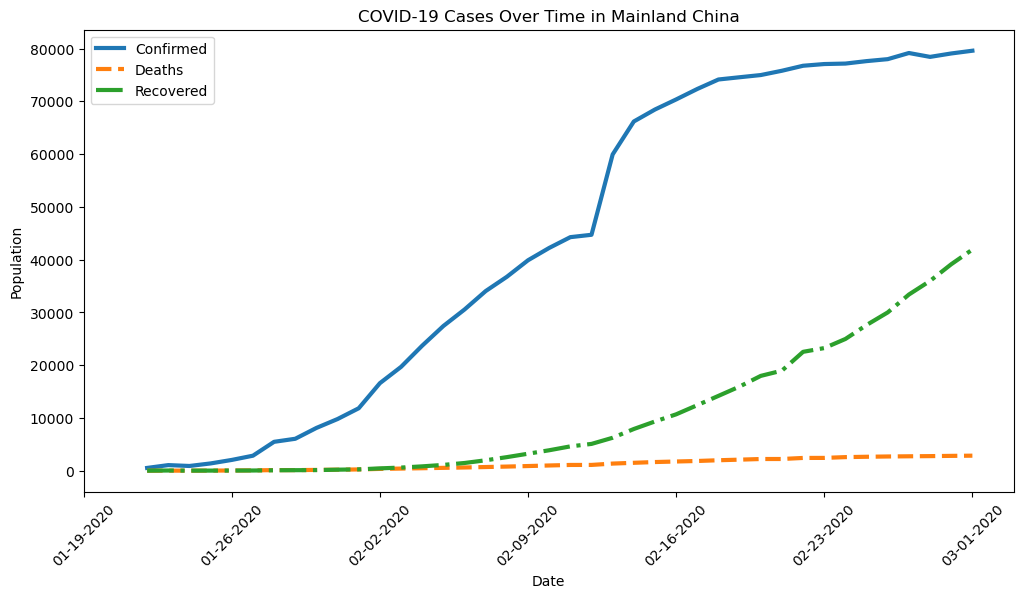

In [93]:
# The final step is plotting the data.
# We used a line graph

import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator


csv_files_path = "C:/Users/jjiro/OneDrive - University of Kent/MAST4016 - DS Practice/Projects (Assessments)/Group project/*.csv"

# glob() function is used to retrieve filenames
csv_files = glob.glob(csv_files_path)
dataframes = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

combined_df['Last Update'] = pd.to_datetime(combined_df['Last Update'], format='mixed')
    
china_df = combined_df[combined_df['Country/Region'] == 'Mainland China']

china_df['Last Update'] = china_df['Last Update'].dt.strftime('%m-%d-%Y')

grouped_data = china_df.groupby('Last Update', as_index=False).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
})

selected_columns = ['Confirmed', 'Deaths', 'Recovered', 'Last Update']
grouped_data = grouped_data[selected_columns]

grouped_data['Last Update'] = pd.to_datetime(grouped_data['Last Update'])

start_date = pd.Timestamp('2020-01-19')
end_date = pd.Timestamp('2020-03-01')

grouped_data = grouped_data[(grouped_data['Last Update'] >= start_date) & (grouped_data['Last Update'] <= end_date)]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['Last Update'], grouped_data['Confirmed'], label='Confirmed', linestyle='-', linewidth=3)
plt.plot(grouped_data['Last Update'], grouped_data['Deaths'], label='Deaths', linestyle='--', linewidth=3)
plt.plot(grouped_data['Last Update'], grouped_data['Recovered'], label='Recovered', linestyle='-.', linewidth=3)

plt.xlabel('Date')
plt.ylabel('Population')
plt.title('COVID-19 Cases Over Time in Mainland China')
plt.legend()

dates = pd.date_range(start=start_date, end=end_date, freq='W')
plt.xticks(ticks=dates, labels=[date.strftime('%m-%d-%Y') for date in dates], rotation=45)

plt.show()